In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score,mean_squared_error,mean_absolute_error,r2_score


In [ ]:
df=pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
- CAEC : Feature, Categorical, " Do you eat any food between meals? "
- SMOKE : Feature, Binary, " Do you smoke? "
- CH2O: Feature, Continuous, " How much water do you drink daily? "
- SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
- FAF: Feature, Continuous, " How often do you have physical activity? "
- TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
- CALC : Feature, Categorical, " How often do you drink alcohol? "
- MTRANS : Feature, Categorical, " Which transportation do you usually use? "

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
df["Male"] = df["Gender"].map({"Male": 1, "Female": 0})
df=df.drop(columns="Gender")

In [6]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
df["BMI"]=df["Weight"]/(df["Height"])**2

In [8]:
df["family_with_overweight"]=df["family_history_with_overweight"].map({"yes":1,"no":0})
df=df.drop(columns="family_history_with_overweight")

In [9]:
df["Alcohol"]=df["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df=df.drop(columns="CALC")

In [10]:
#nos centramos en si se ejercita de alguna forma o depende de un medio de transporte
df["MTRANS"].unique()
df["Andar_bici"]=df["MTRANS"].map({'Public_Transportation':0,'Automobile':0, 'Motorbike':0,'Walking':1,'Bike':1})
df=df.drop(columns="MTRANS")

In [11]:
#Nos vamos a centrar en si la persona pica o no entre horas, independientemente de la frecuencia, ya que no sabemos la cantidad que es lo realmente importante
df["Picoteo"]=df["CAEC"].map({'Sometimes':1, 'Frequently':1, 'Always':1, 'no':0})
df=df.drop(columns="CAEC")

In [12]:
df["Fumador"]=df["SMOKE"].map({'no':0,"yes":1})
df=df.drop(columns="SMOKE")

In [13]:
df["SCC"].unique()
df["Control_kcal"]=df["SCC"].map({'no':0,"yes":1})
df=df.drop(columns="SCC")

In [14]:
df["FastFood"]=df["FAVC"].map({'no':0,"yes":1})
df=df.drop(columns="FAVC")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2111 non-null   float64
 1   Height                  2111 non-null   float64
 2   Weight                  2111 non-null   float64
 3   FCVC                    2111 non-null   float64
 4   NCP                     2111 non-null   float64
 5   CH2O                    2111 non-null   float64
 6   FAF                     2111 non-null   float64
 7   TUE                     2111 non-null   float64
 8   NObeyesdad              2111 non-null   object 
 9   Male                    2111 non-null   int64  
 10  BMI                     2111 non-null   float64
 11  family_with_overweight  2111 non-null   int64  
 12  Alcohol                 2111 non-null   int64  
 13  Andar_bici              2111 non-null   int64  
 14  Picoteo                 2111 non-null   

In [16]:
df["FAF"].nunique()

1190

In [17]:
df["Age"]=df["Age"].astype(int)

<Axes: >

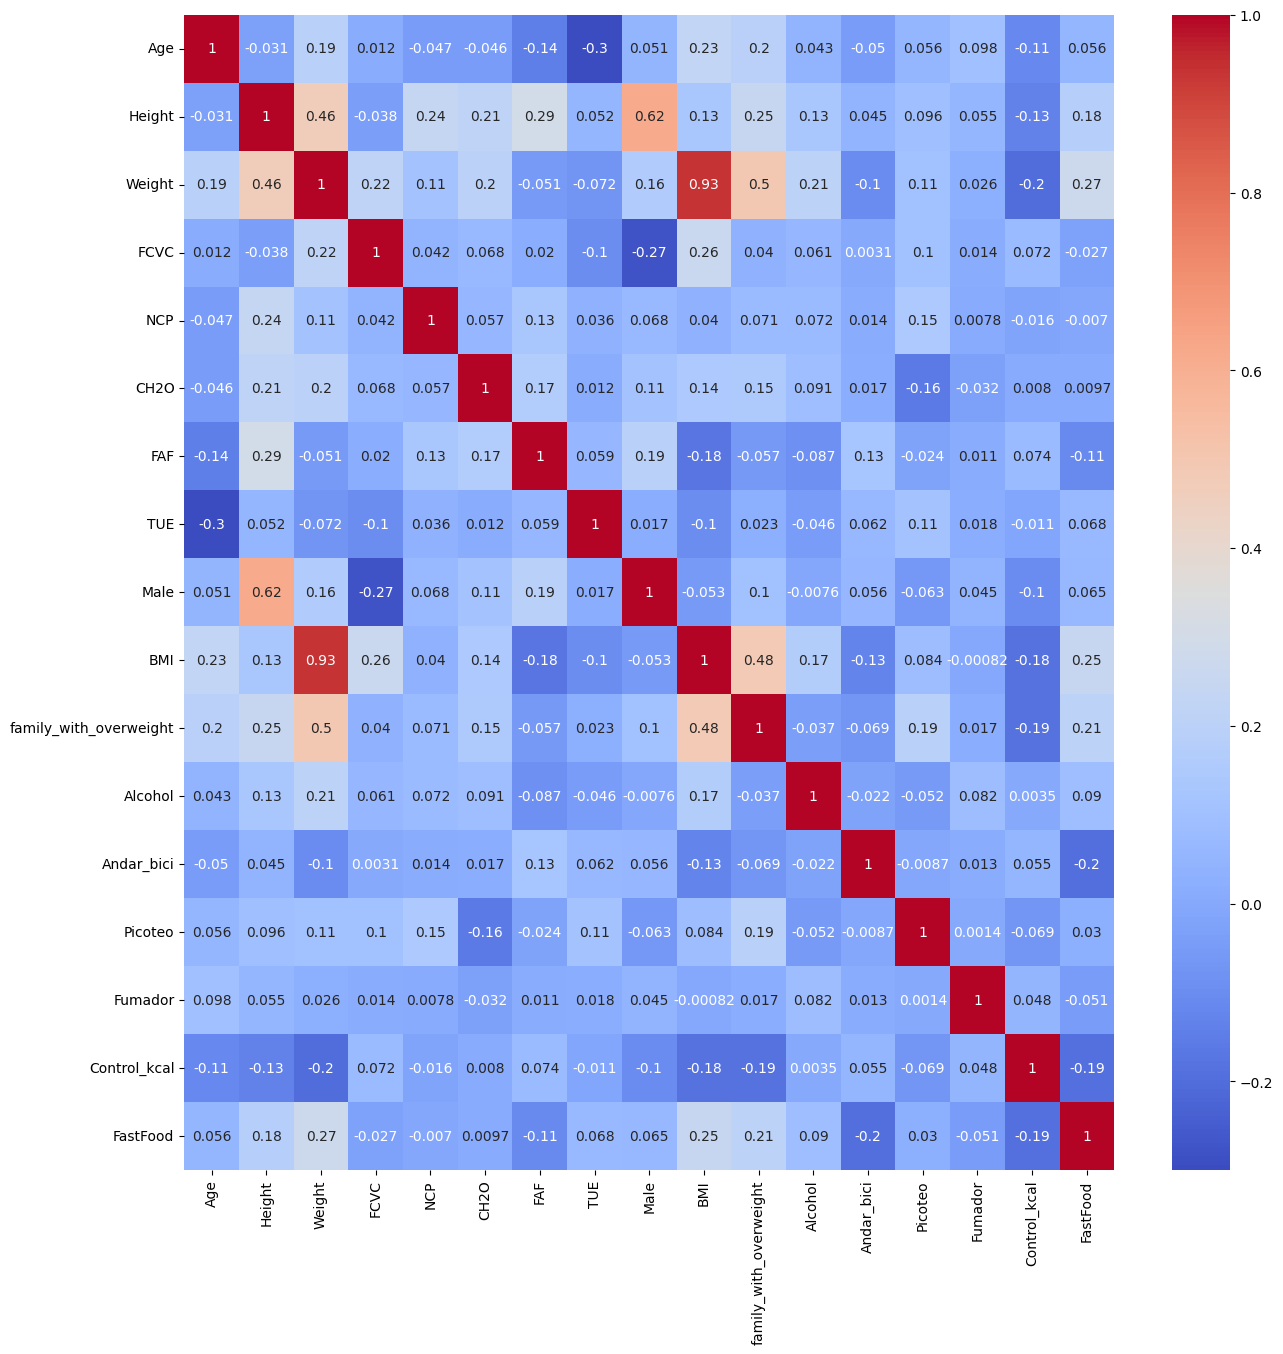

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap((df.drop(columns="NObeyesdad")).corr(),annot=True,cmap="coolwarm")

In [19]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Male', 'BMI', 'family_with_overweight', 'Alcohol',
       'Andar_bici', 'Picoteo', 'Fumador', 'Control_kcal', 'FastFood'],
      dtype='object')

In [20]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["BMI"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

In [23]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.9902139135403228
R2 score train 0.9905006739520524
MAE 0.5975386158017404
MSE 0.6464312554406774
RMSE 0.8040094871583776


LinearRegression()

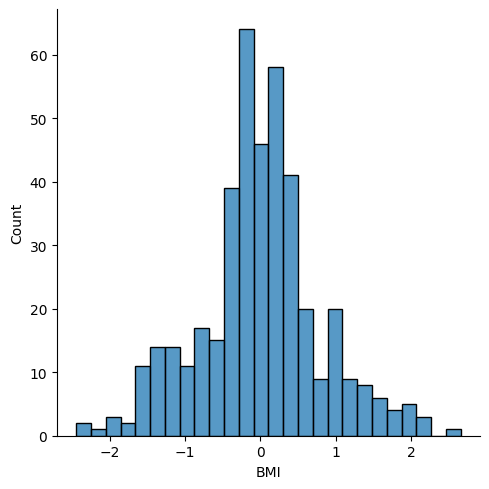

In [24]:
model_1 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_1

R2 score 0.9902139135403227
R2 score train 0.9905006739520524
MAE 0.5975386158017337
MSE 0.6464312554406806
RMSE 0.8040094871583796


LinearRegression()

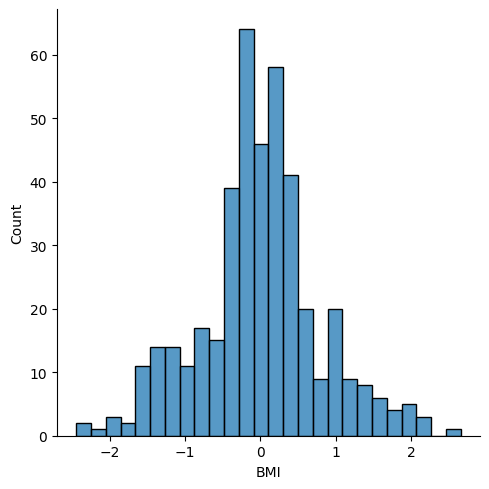

In [25]:
model_2 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_2

R2 score 0.986761941247038
R2 score train 0.9868778270722159
MAE 0.7203350516969992
MSE 0.8744552763288164
RMSE 0.9351231343137739


Ridge(alpha=2)

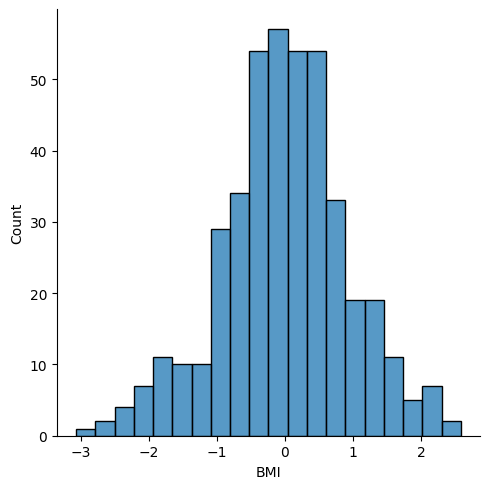

In [26]:
model_4 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_4

R2 score 0.9999344818561171
R2 score train 0.999934287134717
MAE 0.047236292542223154
MSE 0.004327876744077243
RMSE 0.06578660003433255


LinearRegression()

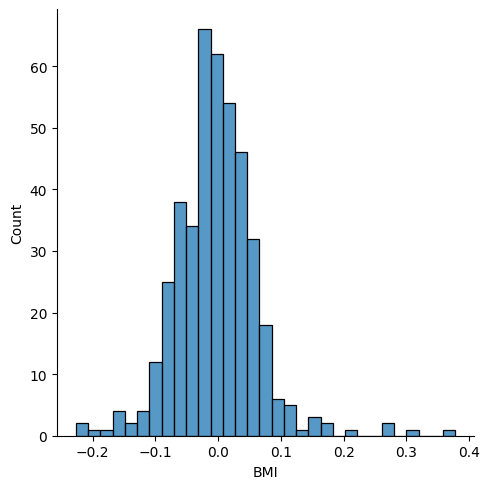

In [27]:
pol_2 = PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X_train)
X_test_pol2 = pol_2.transform(X_test)

model_5 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_5

R2 score 0.9934526712797164
R2 score train 0.9838528483612364
MAE 0.5052888649728896
MSE 0.4324913684213821
RMSE 0.6576407593978509


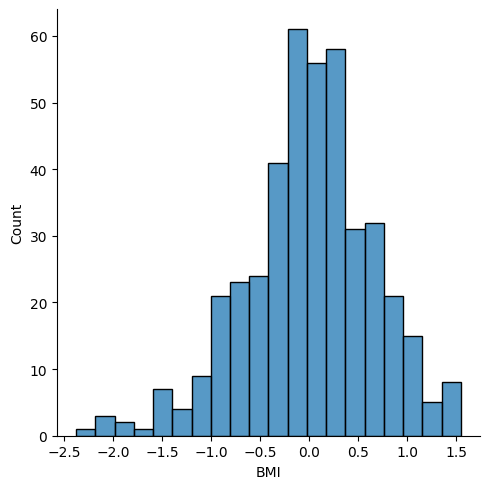

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_test, y_test)

y_pred_reg = rnd_reg.predict(X_test)
print("R2 score", rnd_reg.score(X_test, y_test))
print("R2 score train",rnd_reg.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

In [29]:
X_test

,Age,Height,Weight,family_with_overweight,Alcohol,Andar_bici,Control_kcal,FastFood,Male
544,20,1.755978,53.699561,1,0,0,0,1,0
1987,26,1.624950,111.004920,1,1,0,0,1,0
420,18,1.850000,60.000000,1,1,0,1,1,1
527,21,1.520000,42.000000,0,1,0,0,1,0
196,22,1.750000,74.000000,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
447,19,1.800000,87.000000,1,1,0,0,1,1
1793,30,1.650189,101.141277,1,0,0,0,1,1
73,19,1.850000,65.000000,1,1,1,0,0,1
1711,28,1.758618,113.501549,1,1,0,0,1,1


In [30]:
df_resultados = pd.DataFrame({'Age':X_test["Age"], 'Height (m)':X_test['Height'],'Male':X_test['Male'],'Weight (kg)':X_test['Weight'],"BMI": y_pred_reg})

In [31]:
df["NObeyesdad"].rename({"NObeyesdad":"Categoria"},inplace=True)

In [32]:
def clasificar_bmi(imc):
    if imc < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= imc < 24.9:
        return 'Normal_Weight'
    elif 24.9 <= imc < 27.9:
        return 'Overweight_Level_I'
    elif 27.9 <= imc < 29.9:
        return 'Overweight_Level_II'
    elif 29.9 <= imc < 34.9:
        return 'Obesity_Type_I'
    elif 34.9 <= imc <= 39.9:
        return 'Obesity_Type_II'
    else:
        return 'Obesity_Type_III'

df_resultados["Categoria"] = df_resultados["BMI"].apply(clasificar_bmi)


In [33]:
def calcular_grasa_bmi(row):
    """
    Calcula el porcentaje de grasa corporal basado en el BMI.
    
    Parámetros:
    - row: Una fila del DataFrame con las columnas necesarias
    
    Retorna:
    - Porcentaje estimado de grasa corporal
    """
    bmi = row["BMI"]
    edad = row["Age"]
    sexo = row["Male"]  # 1 para hombres, 0 para mujeres
    
    if sexo == 1:
        return 1.20 * bmi + 0.23 * edad - 16.2
    else:
        return 1.20 * bmi + 0.23 * edad - 5.4  




In [34]:
df_resultados["Fat_Percentage"] = round(df_resultados.apply(calcular_grasa_bmi, axis=1),2)

df_resultados.head()

,Age,Height (m),Male,Weight (kg),BMI,Categoria,Fat_Percentage
544,20,1.755978,0,53.699561,17.694337,Insufficient_Weight,20.43
1987,26,1.624950,0,111.004920,41.702516,Obesity_Type_III,50.62
420,18,1.850000,1,60.000000,18.139699,Insufficient_Weight,9.71
527,21,1.520000,0,42.000000,18.079755,Insufficient_Weight,21.13
196,22,1.750000,1,74.000000,24.264697,Normal_Weight,17.98


In [40]:
X_new=[[24,1.64,54,0,1,0,1,0,0]]
X_kcl_pol2 = pol_2.transform(X_new)
y_pred_kcal = model_5.predict(X_kcl_pol2)
y_pred_reg

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([19.26800134])

In [ ]:
# X_new=[[24,1.64,54,0,1,0,1,0,0]]
# y_pred_reg = rnd_reg.predict(X_new)
# y_pred_reg

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19.26800134])

------------------

# GUARDAR MODELO

In [36]:
import pickle

In [ ]:
with open("modelos/rnd_reg_obesity.pkl", "wb") as obes_model:
    pickle.dump(rnd_reg, obes_model)